# TensorFLow


## Computational graphs

In TensorFlow, computations are represented as directed acyclic graphs or computational graphs. Nodes represent operations or computations. These include mathematical operations, variable assignments, or high-level operations like neural network layers. Each node performs a specific operation on its input data and produces an output. On the other hand, edges represent the flow of data between nodes. They carry tensors, which are multi-dimensional arrays, from one node to another. Edges also define the dependencies between nodes, indicating the order in which operations should be executed. Tensors are the data structures that flow through the edges of the graph. They represent the inputs, outputs, and intermediate results of operations. Tensors can have various ranks, such as scalars, vectors, matrices, or higher-dimensional arrays, and are the fundamental building blocks in TensorFlow.

In [ ]:
import tensorflow as tf

# Define nodes in the computational graph
a = tf.constant(2.0, name='a')
b = tf.constant(3.0, name='b')
c = tf.add(a, b, name='c')

# Print the computational graph
print("Computational Graph Nodes:")
print(a)
print(b)
print(c)

Computational Graph Nodes:
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)


## Machine Learning models

Image classification

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values to be between 0 and 1

# Build a simple neural network using the Keras Sequential API
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 1D array
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8579 - loss: 0.4833 - val_accuracy: 0.9530 - val_loss: 0.1562
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9550 - loss: 0.1545 - val_accuracy: 0.9700 - val_loss: 0.1023
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9665 - loss: 0.1123 - val_accuracy: 0.9715 - val_loss: 0.0910
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9734 - loss: 0.0904 - val_accuracy: 0.9757 - val_loss: 0.0813
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9769 - loss: 0.0747 - val_accuracy: 0.9767 - val_loss: 0.0754
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0890
Test accuracy: 97.67%


# PyTorch

## Pytorch and NumPy integration

In [ ]:
import torch
# Creating a tensor
x = torch.tensor([1, 2, 3])

# Converting to NumPy array
numpy_array = x.numpy()

print('pytorch array:', x)
print('numpy array:', numpy_array)

pytorch array: tensor([1, 2, 3])
numpy array: [1 2 3]


## Dynamic computational graph

PyTorch’s dynamic computational graph allows for defining and modifying the computation graph on the fly. This contrasts with static computation graphs used by some other deep learning frameworks. The dynamic nature of PyTorch’s computational graph is advantageous during model development and debugging because we can print, modify, or analyze the computation graph at runtime. The requires_grad attribute on tensors enables automatic differentiation, allowing the computation of gradients for backpropagation.

In [ ]:
import torch

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x**2
z = y.mean()

z.backward()
print(x.grad)

tensor([0.6667, 1.3333, 2.0000])


Here’s a similar Tensorflow code with static graph implementation:

In [ ]:
import tensorflow as tf

# Define inputs
x = tf.Variable([1.0, 2.0, 3.0], dtype=tf.float32)

# Define computation
y = x ** 2
z = tf.reduce_mean(y)

# Build static computation graph
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.reduce_mean(x ** 2)

# Perform backward pass
grads = tape.gradient(z, x)

# Print gradients
print("Gradients of x:", grads.numpy())

Gradients of x: [0.6666667 1.3333334 2.       ]


## Machine learning algorithms

As a dynamic and versatile deep learning library, PyTorch supports various machine learning algorithms catering to various tasks. Let’s take a look at a simple linear regression model implemented in PyTorch:

Epoch [100/1000], Loss: 0.2024
Epoch [200/1000], Loss: 0.1098
Epoch [300/1000], Loss: 0.0627
Epoch [400/1000], Loss: 0.0371
Epoch [500/1000], Loss: 0.0232
Epoch [600/1000], Loss: 0.0156
Epoch [700/1000], Loss: 0.0115
Epoch [800/1000], Loss: 0.0093
Epoch [900/1000], Loss: 0.0081
Epoch [1000/1000], Loss: 0.0074


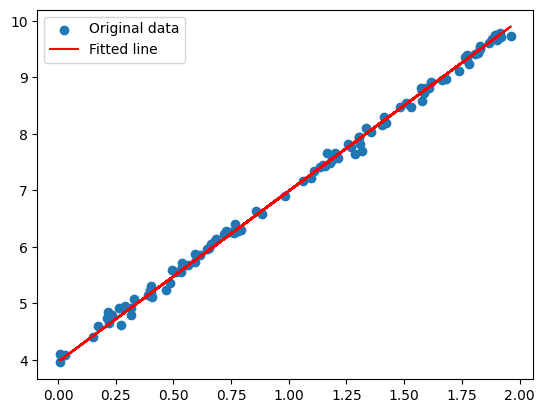

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step 1: Create a Synthetic Dataset
torch.manual_seed(42)  # Setting a seed for reproducibility

# Generating synthetic data
X = 2 * torch.rand(100, 1)
y = 4 + 3 * X + 0.1 * torch.randn(100, 1)

# Step 2: Define the Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Create an instance of the model
model = LinearRegressionModel()

# Step 3: Specify Loss Function and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Step 4: Training the Model
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 5: Make Predictions and Visualize
with torch.no_grad():
    predicted = model(X)

plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted.numpy(), 'r-', label='Fitted line')
plt.legend()
plt.show()

Tensorflow vs. PyTorch

Let’s dive into some key differences of both libraries:

- **Computational graphs**: TensorFlow uses a static computational graph, while PyTorch employs a dynamic one. This impacts the flexibility and ease of debugging during model development.
- **Usability**: PyTorch is often considered more intuitive and user-friendly, especially for those new to deep learning. TensorFlow’s learning curve can be steeper, but TensorFlow 2.0 and the adoption of Keras have made it more accessible.
- **Community**: Both frameworks have large and active communities, but PyTorch gained popularity in the research community due to its dynamic nature. TensorFlow is widely adopted in the industry and has extensive tooling for deployment.
- **Model deployment**: TensorFlow is often chosen for production deployments due to its static graph nature and better integration with TensorFlow Serving. PyTorch has made strides in deployment tools like TorchServe, but TensorFlow is still popular in production environments.

In summary, the choice between TensorFlow and PyTorch depends on personal preference, the nature of the project, and whether the focus is on production deployment or research and experimentation. Both frameworks are powerful and capable, and developers often find themselves comfortable with either based on their specific needs and experiences.